# TiVo - Segmentation Analysis using _k_-means Clustering

## Name & ID

**NAME: STUDENT Z**<br>
*roll no: m04000zzz*

## Import General Packages

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Read and feel the data

### Read in from Excel file

In [38]:
!pip install openpyxl

In [39]:
#TODO-01>> Which command to use to read in the Excel file in data folder?
dtivo_master = pd.read_excel('./data/tivo_subset.xlsx',
                             index_col=0)            #Read in the first column (ID) as the index
dtivo_master.head()

,Gender,Education,Income,Age,PurchasePoint,ElecSpend_Annual,Tvhours,TechAdopt,Fav_Feature
ID,,,,,,,,,
1,male,none,49,30,mass-consumer electronics,420,2,late,saving favorite shows to watch as a family
2,male,none,46,36,mass-consumer electronics,420,10,late,saving favorite shows to watch as a family
3,male,BA,58,66,specialty stores,768,0,early,time shifting
4,male,PhD,51,78,mass-consumer electronics,396,5,late,saving favorite shows to watch as a family
5,female,none,46,52,mass-consumer electronics,540,2,late,saving favorite shows to watch as a family


### Get a feel of the data

In [40]:
dtivo_master.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1 to 1000
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Gender            1000 non-null   object
 1   Education         1000 non-null   object
 2   Income            1000 non-null   int64 
 3   Age               1000 non-null   int64 
 4   PurchasePoint     1000 non-null   object
 5   ElecSpend_Annual  1000 non-null   int64 
 6   Tvhours           1000 non-null   int64 
 7   TechAdopt         1000 non-null   object
 8   Fav_Feature       1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 78.1+ KB


In [41]:
dtivo_master.groupby('TechAdopt')['Fav_Feature'].value_counts()

TechAdopt  Fav_Feature                               
early      cool gadget                                   228
           schedule control                              221
           time shifting                                 221
           programming/interactive features              130
late       saving favorite shows to watch as a family    200
Name: count, dtype: int64

Given this output, we can assign numbers as follows:
1. --> saving favorite...
1. --> cool gadget (general statement, not specific about which feature)
1. --> schedule control (slightly advanced feature)
1. --> time shifting (more advanced feature)
1. --> programming/interactive features (most advanced feature)

In [42]:
#TODO-03: Obtain grouped value counts for Purchase_Point
#and write in commentary under it, what ordinal scale would
#suitable?
dtivo_master.groupby('TechAdopt')['PurchasePoint'].value_counts()


TechAdopt  PurchasePoint            
early      retail                       294
           discount                     293
           specialty stores             170
           web (ebay)                    43
late       mass-consumer electronics    200
Name: count, dtype: int64

Given this output, we can assign numbers as follows:
1. --> discount
1. --> retail
1. --> specialty stores
1. --> web(ebay)
1. --> mass-consumer electronics

## Data Transformations

In [43]:
#Make a copy of the master DataFrame to apply
#transformations to.
dtivo = dtivo_master.copy()

### Factorizations

**CONSIDER USING SIMPLE FACTORIZATION**

#### Education

In [44]:
#TODO-04: Get list/arry of unique categories
ed_types = dtivo['Education'].unique()
print(ed_types)

['none' 'BA' 'PhD' 'MA']


In [45]:
#TODO-05-06: Provide a list of numbers in order required 
#e.g. we want numbers to increase with level of education - 
#so PhD is given 4

ed_levels = [1,2,4,3]  #order numbers matched against ed_types list
dict_edtypes = dict(zip(ed_types,ed_levels))
print(dict_edtypes)

{'none': 1, 'BA': 2, 'PhD': 4, 'MA': 3}


In [46]:
#TODO-07: Map the zipped dictionary from 'Education' to 'Ed_Coded'
dtivo['Ed_Coded'] = dtivo['Education'].map(dict_edtypes)
dtivo.head(10)

,Gender,Education,Income,Age,PurchasePoint,ElecSpend_Annual,Tvhours,TechAdopt,Fav_Feature,Ed_Coded
ID,,,,,,,,,,
1,male,none,49,30,mass-consumer electronics,420,2,late,saving favorite shows to watch as a family,1
2,male,none,46,36,mass-consumer electronics,420,10,late,saving favorite shows to watch as a family,1
3,male,BA,58,66,specialty stores,768,0,early,time shifting,2
4,male,PhD,51,78,mass-consumer electronics,396,5,late,saving favorite shows to watch as a family,4
5,female,none,46,52,mass-consumer electronics,540,2,late,saving favorite shows to watch as a family,1
6,female,BA,31,72,retail,168,1,early,time shifting,2
7,male,none,33,62,discount,216,0,early,cool gadget,1
8,male,none,29,30,retail,276,1,early,schedule control,1
9,male,none,57,60,specialty stores,888,0,early,schedule control,1


#### Fav_Feature

In [47]:
fav_types = dtivo['Fav_Feature'].unique()
list(enumerate(fav_types))  #enumerate just to count number of types

[(0, 'saving favorite shows to watch as a family'),
 (1, 'time shifting'),
 (2, 'cool gadget'),
 (3, 'schedule control'),
 (4, 'programming/interactive features')]

In [48]:
#Given own numerical levels of fav justified earlier.
fav_levels = [1,4,2,3,5]  #follows order of ed_types
dict_favtypes = dict(zip(fav_types,fav_levels))
print(dict_favtypes)

{'saving favorite shows to watch as a family': 1, 'time shifting': 4, 'cool gadget': 2, 'schedule control': 3, 'programming/interactive features': 5}


In [49]:
#Map the zipped dictionary from 'Fav_Feature' to 'Fav_Coded'
dtivo['Fav_Coded'] = dtivo['Fav_Feature'].map(dict_favtypes)
dtivo.head(10)

,Gender,Education,Income,Age,PurchasePoint,ElecSpend_Annual,Tvhours,TechAdopt,Fav_Feature,Ed_Coded,Fav_Coded
ID,,,,,,,,,,,
1,male,none,49,30,mass-consumer electronics,420,2,late,saving favorite shows to watch as a family,1,1
2,male,none,46,36,mass-consumer electronics,420,10,late,saving favorite shows to watch as a family,1,1
3,male,BA,58,66,specialty stores,768,0,early,time shifting,2,4
4,male,PhD,51,78,mass-consumer electronics,396,5,late,saving favorite shows to watch as a family,4,1
5,female,none,46,52,mass-consumer electronics,540,2,late,saving favorite shows to watch as a family,1,1
6,female,BA,31,72,retail,168,1,early,time shifting,2,4
7,male,none,33,62,discount,216,0,early,cool gadget,1,2
8,male,none,29,30,retail,276,1,early,schedule control,1,3
9,male,none,57,60,specialty stores,888,0,early,schedule control,1,3


#### PurchasePoint 

In [50]:
#TODO-08: Get list/arry of unique categories
ppoint_types = dtivo['PurchasePoint'].unique()
list(enumerate(ppoint_types))

[(0, 'mass-consumer electronics'),
 (1, 'specialty stores'),
 (2, 'retail'),
 (3, 'discount'),
 (4, 'web (ebay)')]

Given this output, we can assign numbers as follows:

1. --> discount
1. --> retail
1. --> specialty stores
1. --> web(ebay)
1. --> mass-consumer electronics

In [51]:
#TODO-09-10: Provide a list of numbers in order justified in TODO-03. 
ppoint_levels = [5,3,2,1,4]
dict_pptypes = dict(zip(ppoint_types,ppoint_levels))
print(dict_pptypes)

{'mass-consumer electronics': 5, 'specialty stores': 3, 'retail': 2, 'discount': 1, 'web (ebay)': 4}


In [52]:
#TODO-11: Map the zipped dictionary from 'PurchasePoint' to 'PPoint_Coded'
dtivo['PPoint_Coded'] = dtivo['PurchasePoint'].map(dict_pptypes)
dtivo.head(10)

,Gender,Education,Income,Age,PurchasePoint,ElecSpend_Annual,Tvhours,TechAdopt,Fav_Feature,Ed_Coded,Fav_Coded,PPoint_Coded
ID,,,,,,,,,,,,
1,male,none,49,30,mass-consumer electronics,420,2,late,saving favorite shows to watch as a family,1,1,5
2,male,none,46,36,mass-consumer electronics,420,10,late,saving favorite shows to watch as a family,1,1,5
3,male,BA,58,66,specialty stores,768,0,early,time shifting,2,4,3
4,male,PhD,51,78,mass-consumer electronics,396,5,late,saving favorite shows to watch as a family,4,1,5
5,female,none,46,52,mass-consumer electronics,540,2,late,saving favorite shows to watch as a family,1,1,5
6,female,BA,31,72,retail,168,1,early,time shifting,2,4,2
7,male,none,33,62,discount,216,0,early,cool gadget,1,2,1
8,male,none,29,30,retail,276,1,early,schedule control,1,3,2
9,male,none,57,60,specialty stores,888,0,early,schedule control,1,3,3


### Making Dummy Variables (or One-Hot Encoding)

When we have binary variables **OR** if each category needs its own column,<br>
we use `pd.get_dummies()` to create dummy variable columns.

This is also called **"One-Hot Encoding" (OHE)**, when a category becomes<br>
a binary (0,1) variable.  It is quite useful for performing regression with<br>
categorical explanatory variables.<br>

In our case, OHE can be applied to `TechAdopt` and `Gender` They are binary and<br>
we only need one of them to define the category.

In [53]:
dummCols = ['Gender']   #TODO-12: Add TechAdopt to this list
#TODO-13: apply get_dummies to all columns that need categories
#converted to binary
dtivo = pd.get_dummies(dtivo, columns = dummCols, dtype=int)
dtivo.head()

,Education,Income,Age,PurchasePoint,ElecSpend_Annual,Tvhours,TechAdopt,Fav_Feature,Ed_Coded,Fav_Coded,PPoint_Coded,Gender_female,Gender_male
ID,,,,,,,,,,,,,
1,none,49,30,mass-consumer electronics,420,2,late,saving favorite shows to watch as a family,1,1,5,0,1
2,none,46,36,mass-consumer electronics,420,10,late,saving favorite shows to watch as a family,1,1,5,0,1
3,BA,58,66,specialty stores,768,0,early,time shifting,2,4,3,0,1
4,PhD,51,78,mass-consumer electronics,396,5,late,saving favorite shows to watch as a family,4,1,5,0,1
5,none,46,52,mass-consumer electronics,540,2,late,saving favorite shows to watch as a family,1,1,5,1,0


### Rows to keep for clustering
We are only interested at launch in segments *within* early adopters => filter out late adopters.


In [54]:
#Assuming we have done some segment targeting already - like focus on Early adopters only.
dtivo_early = dtivo[dtivo['TechAdopt']=='early']
len(dtivo_early)

800

In [55]:
outlierIDs = [441, 923]
dtivo_early.drop(index=outlierIDs, inplace=True)

/tmp/ipykernel_13994/1462585914.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dtivo_early.drop(index=outlierIDs, inplace=True)


In [56]:
len(dtivo_early)

798

### Columns to keep for clustering

In [57]:
colsAll = list(dtivo_early.columns)
colsAll

['Education',
 'Income',
 'Age',
 'PurchasePoint',
 'ElecSpend_Annual',
 'Tvhours',
 'TechAdopt',
 'Fav_Feature',
 'Ed_Coded',
 'Fav_Coded',
 'PPoint_Coded',
 'Gender_female',
 'Gender_male']

In [58]:
colsToDrop = ['Education',      #factorized
              'PurchasePoint',  #will be factorized, need to keep its coded form when factorized
              'Tvhours',        #Initially using as descriptor not basis so dropping here, also to keep it simple
              'TechAdopt',      #Don't need after filtering out TechAdopter==late.
              'Fav_Feature',    #factorized
              'Gender_female',  #already have male who are more frequent so don't need female
              'Fav_Coded',      #Treating as descriptor to inform promotion, not as cluster basis.
              'PPoint_Coded',  #Treating as descriptor to inform promotion, not as cluster basis.
                                #TODO-14 - ADD MORE COLUMNS TO DROP AFTER COMPLETING EARLIER TODOS
             ]

dtivo_bases = dtivo_early.drop(columns=colsToDrop)
colsKept = list(dtivo_bases.columns)
print(colsKept)
dtivo_bases.head()

['Income', 'Age', 'ElecSpend_Annual', 'Ed_Coded', 'Gender_male']


,Income,Age,ElecSpend_Annual,Ed_Coded,Gender_male
ID,,,,,
3,58,66,768,2,1
6,31,72,168,2,0
7,33,62,216,1,1
8,29,30,276,1,1
9,57,60,888,1,1


## Normalize using Standardization

If Clustering has to give equal weight to each field (or 'feature' in ML terms), then<br>
we must make sure they are on the same scale (i.e. **Normalize** the fields).

If we are interested in how our segments vary from the average (e.g. <br>
above average income, highly below average age, etc.), then we use<br>
**Standardization** for normalization.


In [59]:
#IMPORT PACKAGE FOR STANDARDIZATION
from sklearn import preprocessing

In [60]:
#STANDARDIZED SCALING
## TODO-23: need to reconvert to DataFrame as sklearn produces
## numerical array without headings
dtivo_std = pd.DataFrame(preprocessing.scale(dtivo_bases),
                         columns=colsKept,                 #TODO-15: REVIEW in light of TODO-14.
                         index=dtivo_bases.index
                        )

#only for checking if done
dtivo_std.describe().round(2)

,Income,Age,ElecSpend_Annual,Ed_Coded,Gender_male
count,798.00,798.00,798.00,798.00,798.00
mean,-0.00,-0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00
min,-1.33,-1.59,-1.19,-0.73,-1.11
25%,-0.67,-0.93,-0.69,-0.73,-1.11
50%,-0.39,0.00,-0.52,-0.73,0.90
75%,-0.01,0.88,0.38,0.35,0.90
max,2.72,1.82,3.34,2.51,0.90


In [61]:
dtivo_std.head()

,Income,Age,ElecSpend_Annual,Ed_Coded,Gender_male
ID,,,,,
3,2.156536,1.046405,1.999336,0.353368,0.904305
6,-0.387246,1.376349,-0.798654,0.353368,-1.105822
7,-0.198818,0.826443,-0.574815,-0.727044,0.904305
8,-0.575674,-0.933254,-0.295016,-0.727044,0.904305
9,2.062321,0.716462,2.558934,-0.727044,0.904305


## K-means Clustering

In [62]:
#Import Required Packages
from sklearn.cluster import KMeans

### Learning Step: Start by making k=4 clusters

#### Fitting the k-means model for k=4

In [63]:
#TODO-16: Fit 4 clusters using KMeans to standardized data
k4_model = KMeans(n_clusters=4, 
                  random_state=111).fit(dtivo_std)

#### Tagging the segmentation bases dataset with cluster numbers

In [64]:
#TODO-17: Tag clusters in df _cl2 for cluster analysis
dtivo_k4 = dtivo_bases.copy()
dtivo_k4['k4'] = k4_model.labels_
dtivo_k4.head()

,Income,Age,ElecSpend_Annual,Ed_Coded,Gender_male,k4
ID,,,,,,
3,58,66,768,2,1,3
6,31,72,168,2,0,2
7,33,62,216,1,1,1
8,29,30,276,1,1,1
9,57,60,888,1,1,3


In [65]:
dtivo_k4.to_csv("dtivo_k4.csv")

### Learning Step: First Cluster Analysis

#### Basic summary table

In [66]:
#TODO-18: Select appropriate metrics to summarize the cluster features.
pivot_k4 = dtivo_k4.groupby('k4').agg(['mean', 'std']).round(1)
pivot_k4.insert(0, 'Size', dtivo_k4.groupby('k4').size())
pivot_k4

Size Income        Age       ElecSpend_Annual        Ed_Coded       \
          mean  std  mean   std             mean    std     mean  std   
k4                                                                      
0   123   30.4  4.3  27.3  10.8            372.1   78.6      3.1  0.8   
1   267   30.0  3.6  52.6  16.8            214.5   56.5      1.2  0.4   
2   245   29.9  3.1  48.5  17.3            213.3   61.8      1.2  0.4   
3   163   54.8  3.7  50.3  16.4            708.2  153.0      2.2  0.8   

   Gender_male       
          mean  std  
k4                   
0          0.5  0.5  
1          1.0  0.0  
2          0.0  0.0  
3          0.7  0.5

In [67]:
pivot_k4.to_excel('pivot_k4_tivo.xlsx')

In [68]:
#TODO-19: GO BACK TO 'Rows to keep for clustering' and use the following code _there_ to 
#drop the 2 records that are outliers (As k-means has some randomness in it, your cluster
#number may be different for the 2 records - please adjust code for that)

#outlierIDs = dtivo_k4[dtivo_k4['k4']==3].index
#print(outlierIDs)

#dtivo_early.drop(index=outlierIDs, inplace=True)
## Ignore the warning - we want to make copy different from original so its ok

#len(dtivo_early)

#### Summary table with Heatmap (k=4)

In [69]:
pk4mins = pivot_k4.min(0)
pk4maxs = pivot_k4.max(0)
mm_pivot = (pivot_k4 - pk4mins)/(pk4maxs-pk4mins)
mm_pivot.round(2)

Size Income         Age       ElecSpend_Annual       Ed_Coded       \
           mean   std  mean   std             mean   std     mean  std   
k4                                                                       
0   0.00   0.02  1.00  0.00  0.00             0.32  0.23     1.00  1.0   
1   1.00   0.00  0.42  1.00  0.92             0.00  0.00     0.00  0.0   
2   0.85   0.00  0.00  0.84  1.00             0.00  0.05     0.00  0.0   
3   0.28   1.00  0.50  0.91  0.86             1.00  1.00     0.53  1.0   

   Gender_male       
          mean  std  
k4                   
0          0.5  1.0  
1          1.0  0.0  
2          0.0  0.0  
3          0.7  1.0

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

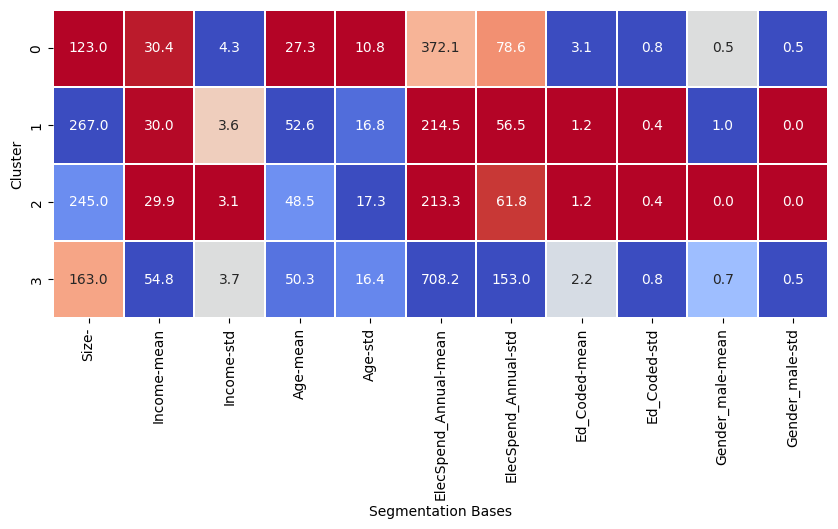

In [71]:
#TODO-20: Use min-max pivot for data, 
#and actual pivot as annotations to the heatmap

fig = plt.figure(figsize=(10, 4))
pk4_map = sns.heatmap(
    mm_pivot,
    annot=pivot_k4,  #actual pivot becomes annotation
    cmap='coolwarm_r',
    cbar=False,
    fmt='.1f',
    lw=0.01)

pk4_map.set(xlabel='Segmentation Bases',
           ylabel = 'Cluster')
plt.show()

In [72]:
fig.savefig('heatmap_k4_tivo.png', dpi=300, bbox_inches='tight')

#### Defining clusters with 'persona' descriptions

In [73]:
pivot_k4_annot = pivot_k4.copy()
pivot_k4_annot['Persona'] = ['Budget-seeking Middle-Aged Woman',
                             'Educated Hi-Spender',
                             'Budget-seeking Middle-Aged Man',
                             'Top-buck Spending Senior'
                            ]
pivot_k4_annot

Size Income        Age       ElecSpend_Annual        Ed_Coded       \
          mean  std  mean   std             mean    std     mean  std   
k4                                                                      
0   123   30.4  4.3  27.3  10.8            372.1   78.6      3.1  0.8   
1   267   30.0  3.6  52.6  16.8            214.5   56.5      1.2  0.4   
2   245   29.9  3.1  48.5  17.3            213.3   61.8      1.2  0.4   
3   163   54.8  3.7  50.3  16.4            708.2  153.0      2.2  0.8   

   Gender_male                                Persona  
          mean  std                                    
k4                                                     
0          0.5  0.5  Budget-seeking Middle-Aged Woman  
1          1.0  0.0               Educated Hi-Spender  
2          0.0  0.0    Budget-seeking Middle-Aged Man  
3          0.7  0.5          Top-buck Spending Senior

In [74]:
pivot_k4_annot.to_excel('pivot_k4_tivo.xlsx')

### Finding the best 'k'

#### Elbow Method

In [75]:
k4_model.inertia_

1415.9484311173583

In [77]:
!pip install yellowbrick

In [80]:
!pip install --upgrade matplotlib

In [81]:
# import matplotlib.pyplot as plt
# plt.rcParams['font.sans-serif'] = ['DejaVu Sans']  # or any other font that is available
# plt.rcParams['font.family'] = 'sans-serif'


In [82]:
#TODO-23: Which visualizer will we use?
from yellowbrick.cluster import KElbowVisualizer

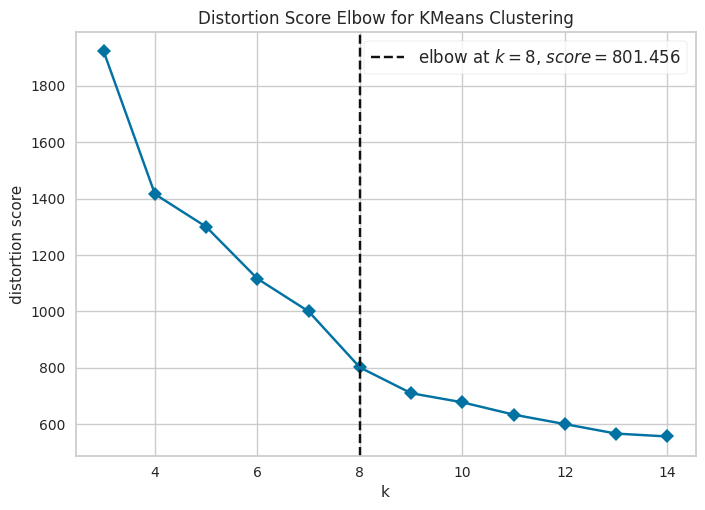

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [83]:
#TODO-24: Set-up the KElbowVisualizer
kBegin = 3
kEnd = 15
km = KMeans(random_state=111)
visualizer = KElbowVisualizer(km, k=(kBegin,kEnd), timings=False)
visualizer.fit(dtivo_std)
visualizer.show()

#### Silhouette Score

##### Average Silhouette Score

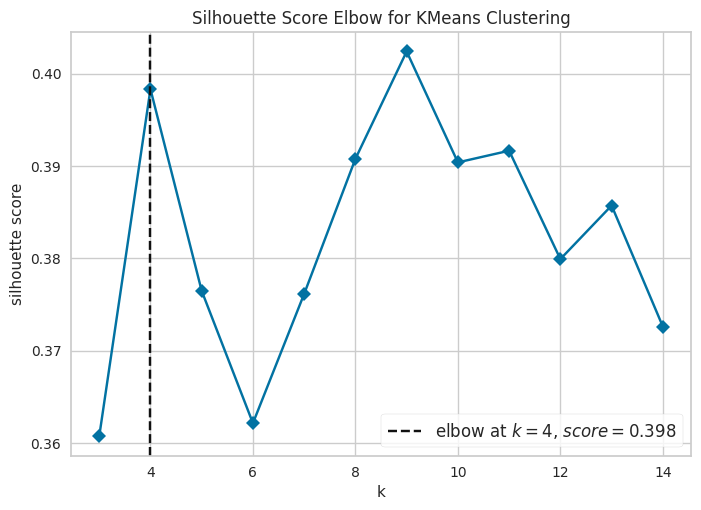

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [84]:
#TODO-25: Change the metric to 'silhouette'
vizElbowSil = KElbowVisualizer(km,
                               metric='silhouette',
                               k=(kBegin, kEnd),
                               timings=False)
vizElbowSil.fit(dtivo_std)
vizElbowSil.show()

##### Detailed Silhouette per Clustering

In [85]:
dtivo_std.to_csv("dtivo_reduced_std.csv")

In [86]:
#TODO-26: Import correct Visualizer
from yellowbrick.cluster import SilhouetteVisualizer

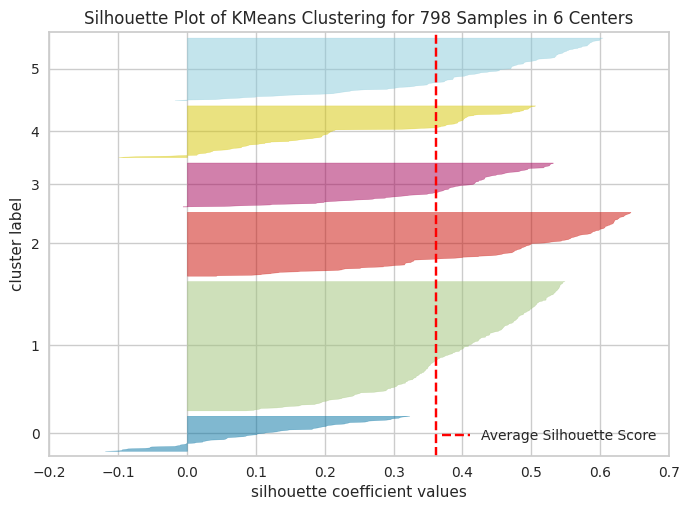

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 798 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [87]:
km = KMeans(n_clusters=6, random_state=111)
silViz = SilhouetteVisualizer(km, colors='yellowbrick')
silViz.fit(dtivo_std)
silViz.show()


<Figure size 800x550 with 0 Axes>

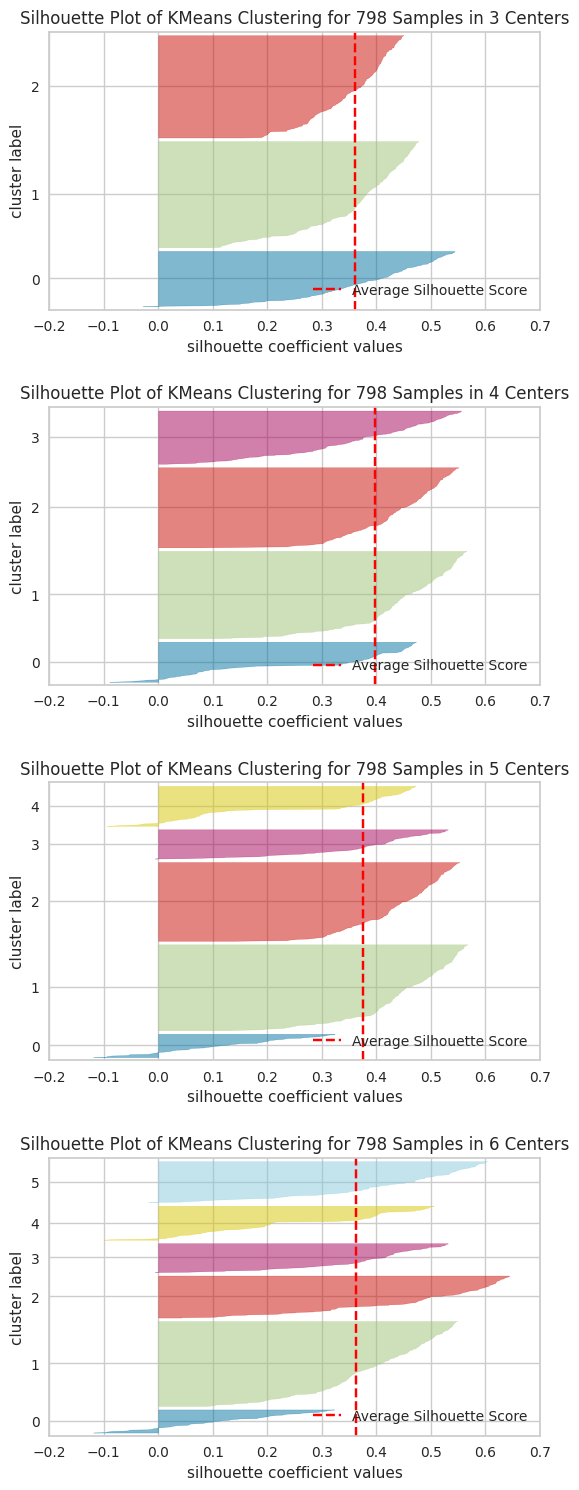

In [88]:
#TODO-27: Setup and run the SilhouetteVisualizer
plt.clf()
kStart = 3
kStop = 7  #last k for which you want a subplot
subx = 0  #staring row index of subplot on which to plot
fig, ax = plt.subplots(kStop - kStart, 1,
                       figsize=(7, 16), sharex=True)
fig.tight_layout(pad=5.0)
for i in range(kStart, kStop):
    ax[subx].set_title(f"Silhouette values for k= {i}")
    ax[subx].tick_params(labelbottom=True)
    km = KMeans(n_clusters=i, random_state=111)
    silViz = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[subx])
    silViz.fit(dtivo_std)
    silViz.finalize()
    subx += 1

### Clustering using best k in k=3 to k=6 range

#### Fitting the k-means model for k= 6

In [89]:
k6_model = KMeans(n_clusters=6, 
                  random_state=111).fit(dtivo_std)

#### Tagging the segmentation bases dataset with cluster numbers

In [90]:
dtivo_k6 = dtivo_bases.copy()
dtivo_k6['k6'] = k6_model.labels_
dtivo_k6.head()

,Income,Age,ElecSpend_Annual,Ed_Coded,Gender_male,k6
ID,,,,,,
3,58,66,768,2,1,3
6,31,72,168,2,0,2
7,33,62,216,1,1,1
8,29,30,276,1,1,1
9,57,60,888,1,1,3


#### Cluster Analysis k=6

#### Basic summary table

In [91]:
pivot_k6 = dtivo_k6.groupby('k6').agg(['mean', 'std']).round(1)
pivot_k6.insert(0, 'Size', dtivo_k6.groupby('k6').size())
pivot_k6

Size Income        Age       ElecSpend_Annual        Ed_Coded       \
          mean  std  mean   std             mean    std     mean  std   
k6                                                                      
0    73   53.4  3.7  40.2  14.5            649.3  166.5      2.4  0.8   
1   266   29.9  3.3  52.5  16.8            214.2   56.3      1.2  0.4   
2   132   29.9  3.0  62.3   9.5            200.3   38.4      1.2  0.4   
3    91   56.0  3.1  58.5  13.0            751.1  130.5      2.0  0.7   
4   107   30.4  4.5  27.8  11.5            365.2   80.4      3.3  0.7   
5   129   29.9  3.0  31.3   7.7            252.0   97.9      1.2  0.4   

   Gender_male       
          mean  std  
k6                   
0          0.4  0.5  
1          1.0  0.0  
2          0.0  0.0  
3          1.0  0.2  
4          0.5  0.5  
5          0.0  0.0

In [92]:
#TODO-27: What fields are being multiplied to get value the segment?
k6_segValues = pivot_k6['ElecSpend_Annual']['mean']*pivot_k6['Size']
k6_segValues = k6_segValues.sort_values(ascending=False)
k6_segValues.map('${:,.0f}'.format)  #after : comes the formating --> , for commas and .0f for 0 decimal places float

k6
3    $68,350
1    $56,977
0    $47,399
4    $39,076
5    $32,508
2    $26,440
dtype: object

In [93]:
pivot_k6.to_excel('pivot_k6_tivo.xlsx')

#### Summary table with Heatmap (k=6)

In [94]:
pk6mins = pivot_k6.min(0)
pk6maxs = pivot_k6.max(0)
mm_pivot = (pivot_k6 - pk6mins)/(pk6maxs-pk6mins)

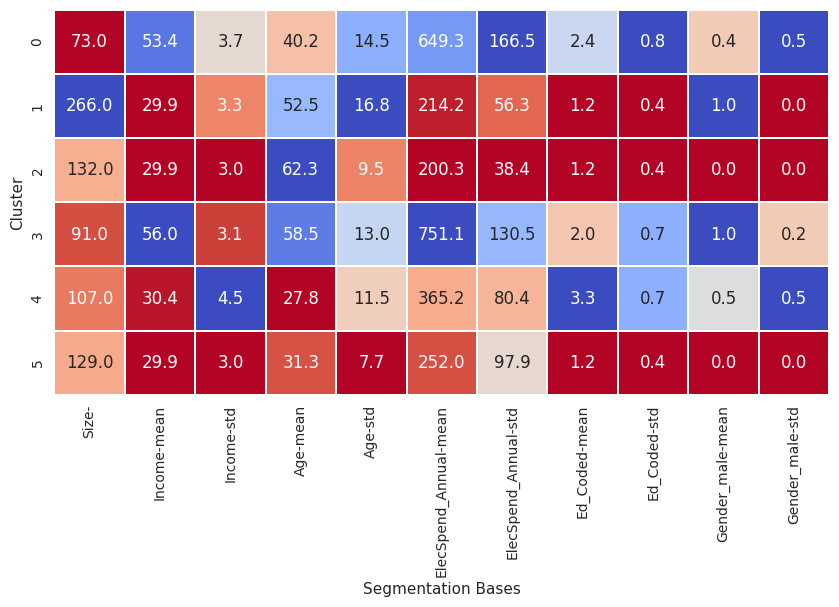

In [95]:
fig = plt.figure(figsize=(10, 5))
pk6_map = sns.heatmap(
    mm_pivot,
    annot=pivot_k6,  #actual pivot becomes annotation
    cmap='coolwarm_r',
    cbar=False,
    fmt='.1f',
    lw=0.01)

pk6_map.set(xlabel='Segmentation Bases',
           ylabel = 'Cluster')
plt.show()

#### Box Plots of k=6 clusters by bases

In [96]:
#TODO-28: We have to use the standardized dataframe to show all features on one scale
dtivo_stdk6 = dtivo_std.copy()
dtivo_stdk6['k6'] = k6_model.labels_
dtivo_stdk6.head()

,Income,Age,ElecSpend_Annual,Ed_Coded,Gender_male,k6
ID,,,,,,
3,2.156536,1.046405,1.999336,0.353368,0.904305,3
6,-0.387246,1.376349,-0.798654,0.353368,-1.105822,2
7,-0.198818,0.826443,-0.574815,-0.727044,0.904305,1
8,-0.575674,-0.933254,-0.295016,-0.727044,0.904305,1
9,2.062321,0.716462,2.558934,-0.727044,0.904305,3


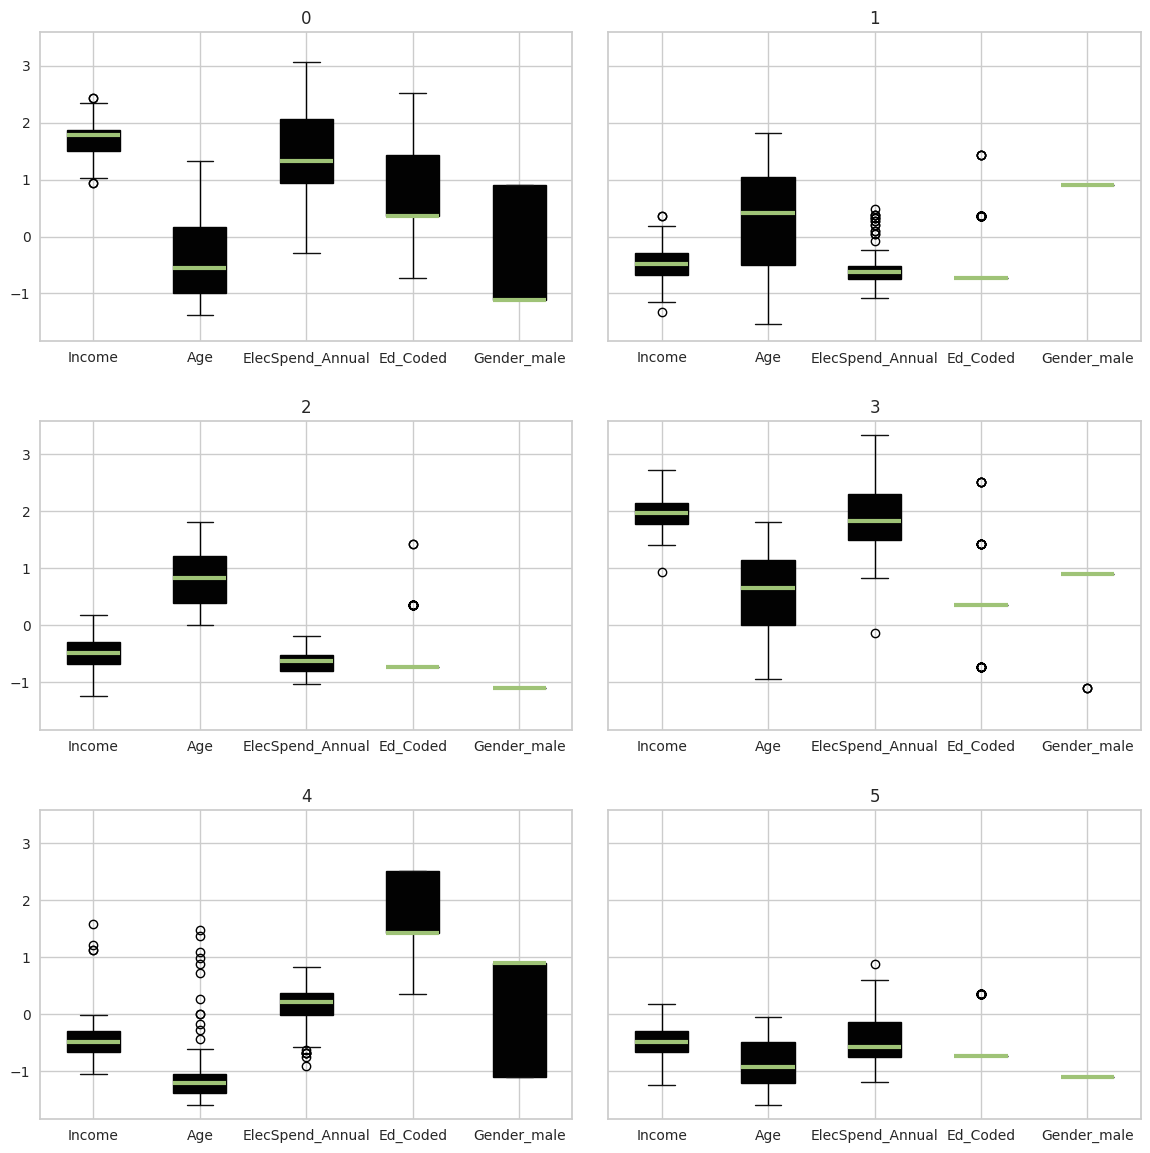

In [97]:
#TODO-29: Tag the standardized dataframe for a common scale plot
medprops = dict(linewidth=3)
gpbxplot = dtivo_stdk6.groupby('k6').boxplot(column=colsKept,
                                             figsize=(12, 12),
                                             patch_artist=True,     #patches are the boxes - True allows us to change its colors
                                             medianprops=medprops)  #can change the median line properties using median props
plt.tight_layout(pad=2.0)

Can choose colormap options from https://matplotlib.org/stable/gallery/color/colormap_reference.html

/tmp/ipykernel_13994/2439030364.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  bxcmap = plt.cm.get_cmap('plasma', len(colsKept))


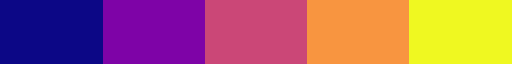

In [98]:
#Have different color and titles for each boxplot
#TODO-30: Choose a matplotlib colormap profile
bxcmap = plt.cm.get_cmap('plasma', len(colsKept))
bxcmap

In [99]:
bxcolors = [bxcmap(i) for i in range(0,len(colsKept))]
bxcolors #in RGB-Alpha form

[(np.float64(0.050383),
  np.float64(0.029803),
  np.float64(0.527975),
  np.float64(1.0)),
 (np.float64(0.494877),
  np.float64(0.01199),
  np.float64(0.657865),
  np.float64(1.0)),
 (np.float64(0.798216),
  np.float64(0.280197),
  np.float64(0.469538),
  np.float64(1.0)),
 (np.float64(0.973416),
  np.float64(0.585761),
  np.float64(0.25154),
  np.float64(1.0)),
 (np.float64(0.940015),
  np.float64(0.975158),
  np.float64(0.131326),
  np.float64(1.0))]

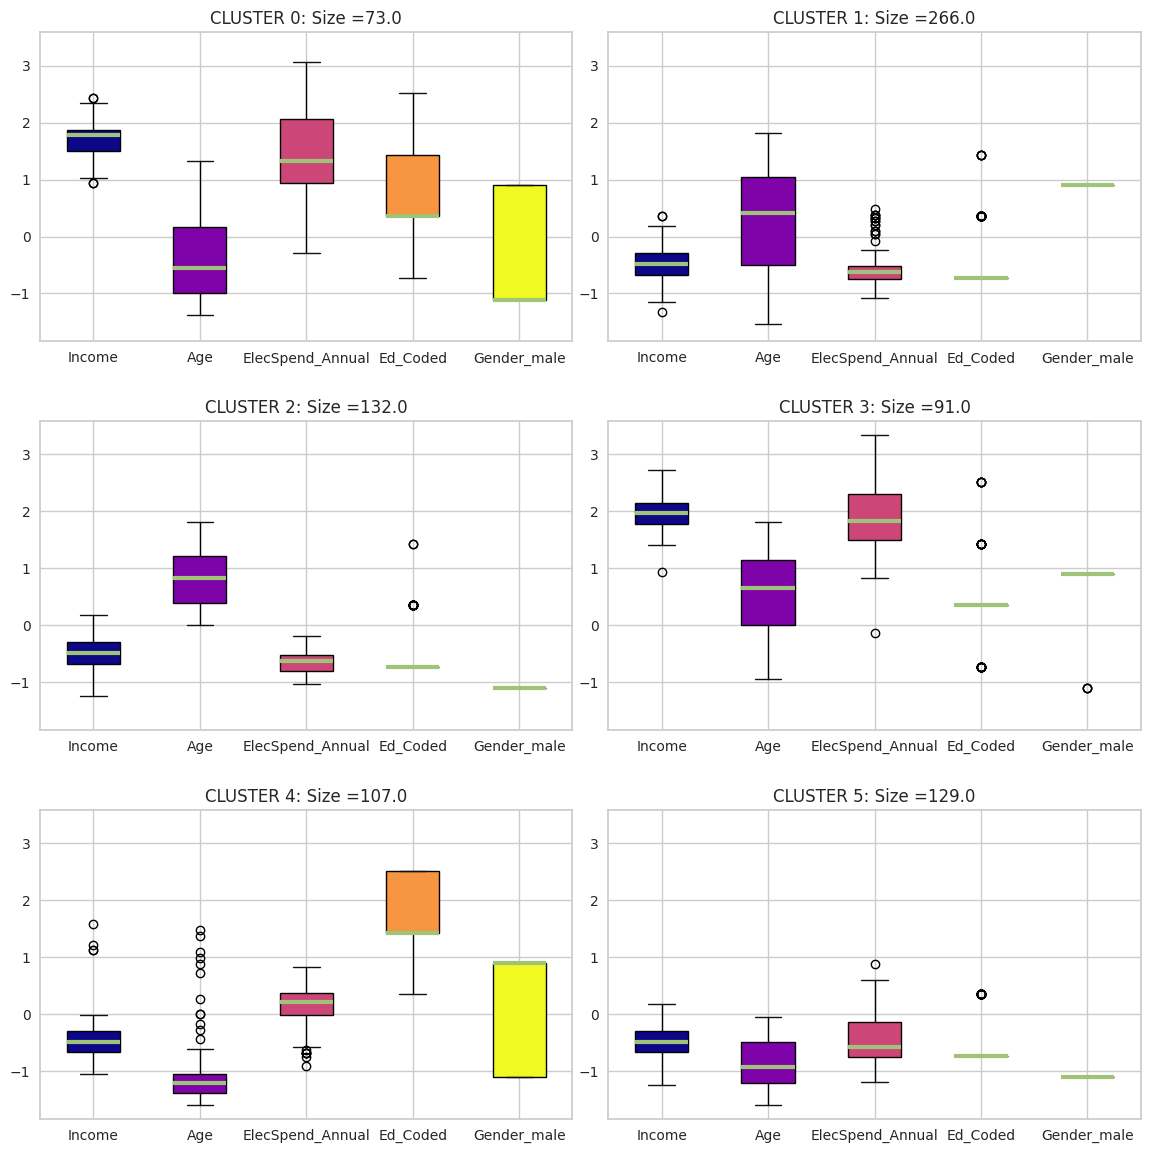

<Figure size 800x550 with 0 Axes>

In [100]:
#TODO-31: How do we change the colors of each groupby boxplot subplot?
#f"..." are f-strings or formatted strings.  They allow using variables between curly brackets {}
for i, ax in enumerate(gpbxplot):
    ax.set_title(f"CLUSTER {i}: Size ={pivot_k6.loc[i,'Size'].iat[0]}")
    ax.tick_params(labelleft=True)
    for j, patch in enumerate(ax.patches):
        patch.set_facecolor(bxcolors[j])
plt.tight_layout(pad=3.0)
gpbxplot[1].get_figure()

In [101]:
#TODO-32: How do we save the plot?
fig_k6boxplot = gpbxplot[1].get_figure()
fig_k6boxplot.savefig('boxplot_k6.png', dpi=400)

## TODO-21: k=5

### TODO-22: Recommendations: quality of k=5 vs. k=4 solution and which segment to target?

<div class="alert alert-block alert-info">Compare your 5 cluster solution with the earlier 4 cluster one:<br>
- is the extra cluster identified worth marketing to?<br>
- Based on the 5 segments solution, which segment(s) should TiVo target<br>
  to fulfill its marketing objective?<br>
- What does it imply for the 4Ps.</div>